In [89]:
import pandas as pd
import numpy as np


In [142]:
churn_df = pd.read_csv('churn_data.csv')


In [143]:
customer_df = pd.read_csv('customer_data.csv')


In [144]:
internet_df =pd.read_csv('internet_data.csv')


Combining different dataframes into one

In [145]:
df_temp=pd.merge(churn_df,customer_df,how='inner',on='customerID')

In [146]:
df=pd.merge(df_temp,internet_df,how='inner',on='customerID')

In [147]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [148]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [150]:
var_list=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary_map(x):
  return x.map({'Yes':1,'No':0})
df[var_list] =  df[var_list].apply(binary_map)


In [151]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [152]:
dummies=pd.get_dummies(df[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
df = pd.concat([dummies,df],axis=1)
df.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,customerID,tenure,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,0,1,0,0,0,0,7590-VHVEG,1,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,1,0,0,0,1,1,0,0,5575-GNVDE,34,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,0,0,0,0,1,1,0,0,3668-QPYBK,2,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,1,0,0,0,0,1,0,0,7795-CFOCW,45,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,0,0,0,1,0,0,1,0,9237-HQITU,2,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [153]:
m1=pd.get_dummies(df['MultipleLines'],prefix='MultipleLines')
ml1=m1.drop(['MultipleLines_No phone service'],1)
df=pd.concat([df,ml1],axis=1)

os=pd.get_dummies(df['OnlineSecurity'],prefix='OnlineSecurity')
os1=os.drop(['OnlineSecurity_No internet service'],1)
df=pd.concat([df,os1],axis=1)


ob=pd.get_dummies(df['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop(['OnlineBackup_No internet service'],1)
df=pd.concat([df,ob1],axis=1)

dp=pd.get_dummies(df['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop(['DeviceProtection_No internet service'],1)
df=pd.concat([df,dp1],axis=1)

ts=pd.get_dummies(df['TechSupport'],prefix='TechSupport')
ts1=ts.drop(['TechSupport_No internet service'],1)
df=pd.concat([df,ts1],axis=1)

st=pd.get_dummies(df['StreamingTV'],prefix='StreamingTV')
st1=st.drop(['StreamingTV_No internet service'],1)
df=pd.concat([df,st1],axis=1)

sm=pd.get_dummies(df['StreamingMovies'],prefix='StreamingMovies')
sm1=sm.drop(['StreamingMovies_No internet service'],1)
df=pd.concat([df,sm1],axis=1)



<ipython-input-153-0e01ab4a5b9a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1=m1.drop(['MultipleLines_No phone service'],1)
<ipython-input-153-0e01ab4a5b9a>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1=os.drop(['OnlineSecurity_No internet service'],1)
<ipython-input-153-0e01ab4a5b9a>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1=ob.drop(['OnlineBackup_No internet service'],1)
<ipython-input-153-0e01ab4a5b9a>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1=dp.drop(['DeviceProtection_No internet service'],1)
<ipython-input-153-0e01ab4a5b9a>:19: FutureWarning: In a future version of pandas all arguments of DataFra

In [154]:
df.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,customerID,tenure,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,0,1,0,0,0,0,7590-VHVEG,1,...,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,1,1,0,0,5575-GNVDE,34,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,0,1,1,0,0,3668-QPYBK,2,...,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,0,1,0,0,7795-CFOCW,45,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0,9237-HQITU,2,...,1,0,1,0,1,0,1,0,1,0


In [155]:
df=df.drop(['Contract','PaymentMethod','gender'
,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],1)

<ipython-input-155-c5d3140f5e53>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['Contract','PaymentMethod','gender'


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Contract_One year                      7043 non-null   uint8  
 1   Contract_Two year                      7043 non-null   uint8  
 2   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 3   PaymentMethod_Electronic check         7043 non-null   uint8  
 4   PaymentMethod_Mailed check             7043 non-null   uint8  
 5   gender_Male                            7043 non-null   uint8  
 6   InternetService_Fiber optic            7043 non-null   uint8  
 7   InternetService_No                     7043 non-null   uint8  
 8   customerID                             7043 non-null   object 
 9   tenure                                 7043 non-null   int64  
 10  PhoneService                           7043 non-null   int64  
 11  Pape

In [157]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Contract_One year                      7043 non-null   uint8  
 1   Contract_Two year                      7043 non-null   uint8  
 2   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 3   PaymentMethod_Electronic check         7043 non-null   uint8  
 4   PaymentMethod_Mailed check             7043 non-null   uint8  
 5   gender_Male                            7043 non-null   uint8  
 6   InternetService_Fiber optic            7043 non-null   uint8  
 7   InternetService_No                     7043 non-null   uint8  
 8   customerID                             7043 non-null   object 
 9   tenure                                 7043 non-null   int64  
 10  PhoneService                           7043 non-null   int64  
 11  Pape

In [159]:
df.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,customerID,tenure,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,0,1,0,0,0,0,7590-VHVEG,1,...,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,1,1,0,0,5575-GNVDE,34,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,0,1,1,0,0,3668-QPYBK,2,...,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,0,1,0,0,7795-CFOCW,45,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0,9237-HQITU,2,...,1,0,1,0,1,0,1,0,1,0


In [160]:
num_telecom=df[['tenure','MonthlyCharges','TotalCharges']]
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


In [161]:
df.isnull().sum()
df.shape
11/7043*100
## removing missing fields
df=df[~np.isnan(df['TotalCharges'])]
df.isnull().sum()


Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [162]:
from sklearn.model_selection import train_test_split
x=df.drop(['Churn','customerID'],axis=1)


In [163]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.70,test_size=.30,random_state=100)

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])


In [167]:
x_train[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,4.922000e+03,4.922000e+03,4.922000e+03
mean,7.506750e-17,-2.064356e-16,1.183757e-16
std,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.286319e+00,-1.548555e+00,-1.002408e+00
25%,-9.598159e-01,-9.665930e-01,-8.344722e-01
50%,-1.435582e-01,1.823658e-01,-3.877341e-01
75%,9.583897e-01,8.341630e-01,6.589888e-01
max,1.611396e+00,1.793569e+00,2.818847e+00


In [168]:
churn=(sum(df['Churn']))/len(df['Churn'].index)*100
churn

26.578498293515356

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-170-c0250f16d424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


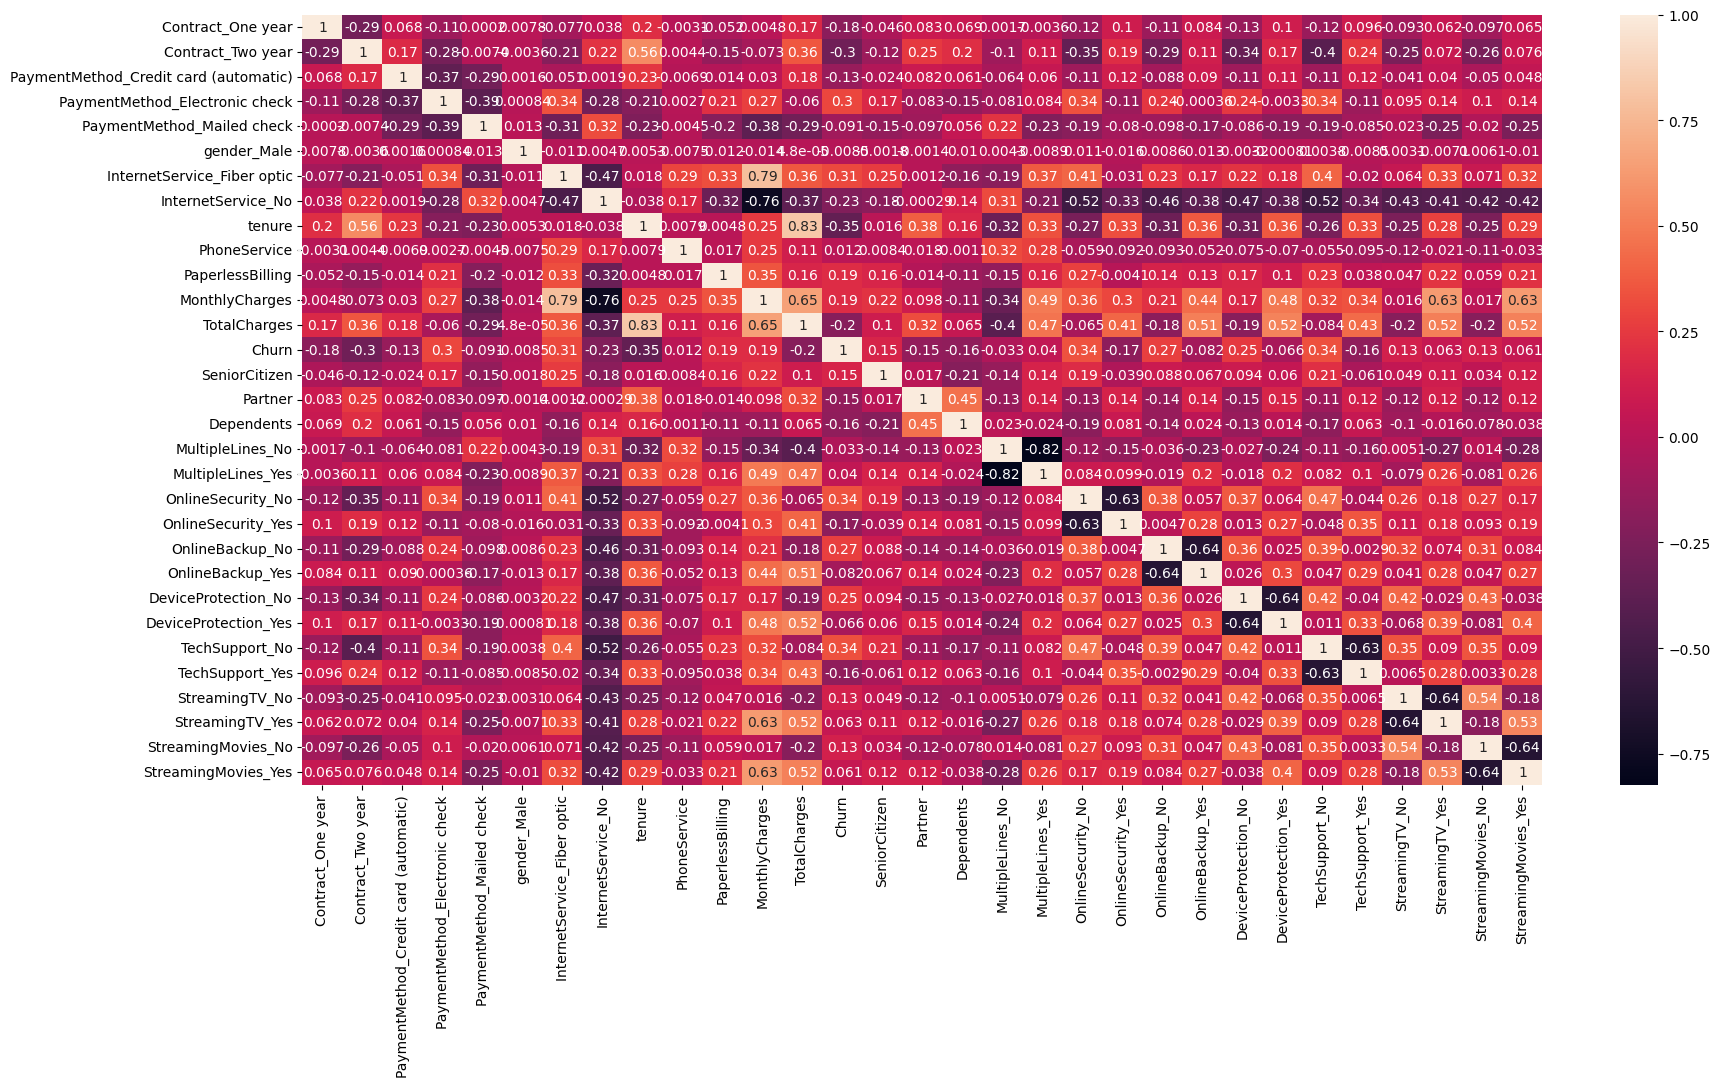

In [170]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [171]:
x_test=x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',
                    'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

<ipython-input-171-bfd3d33b5eaa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',


In [172]:
x_train=x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',
                    'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

<ipython-input-172-ad1e1a2d0454>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',


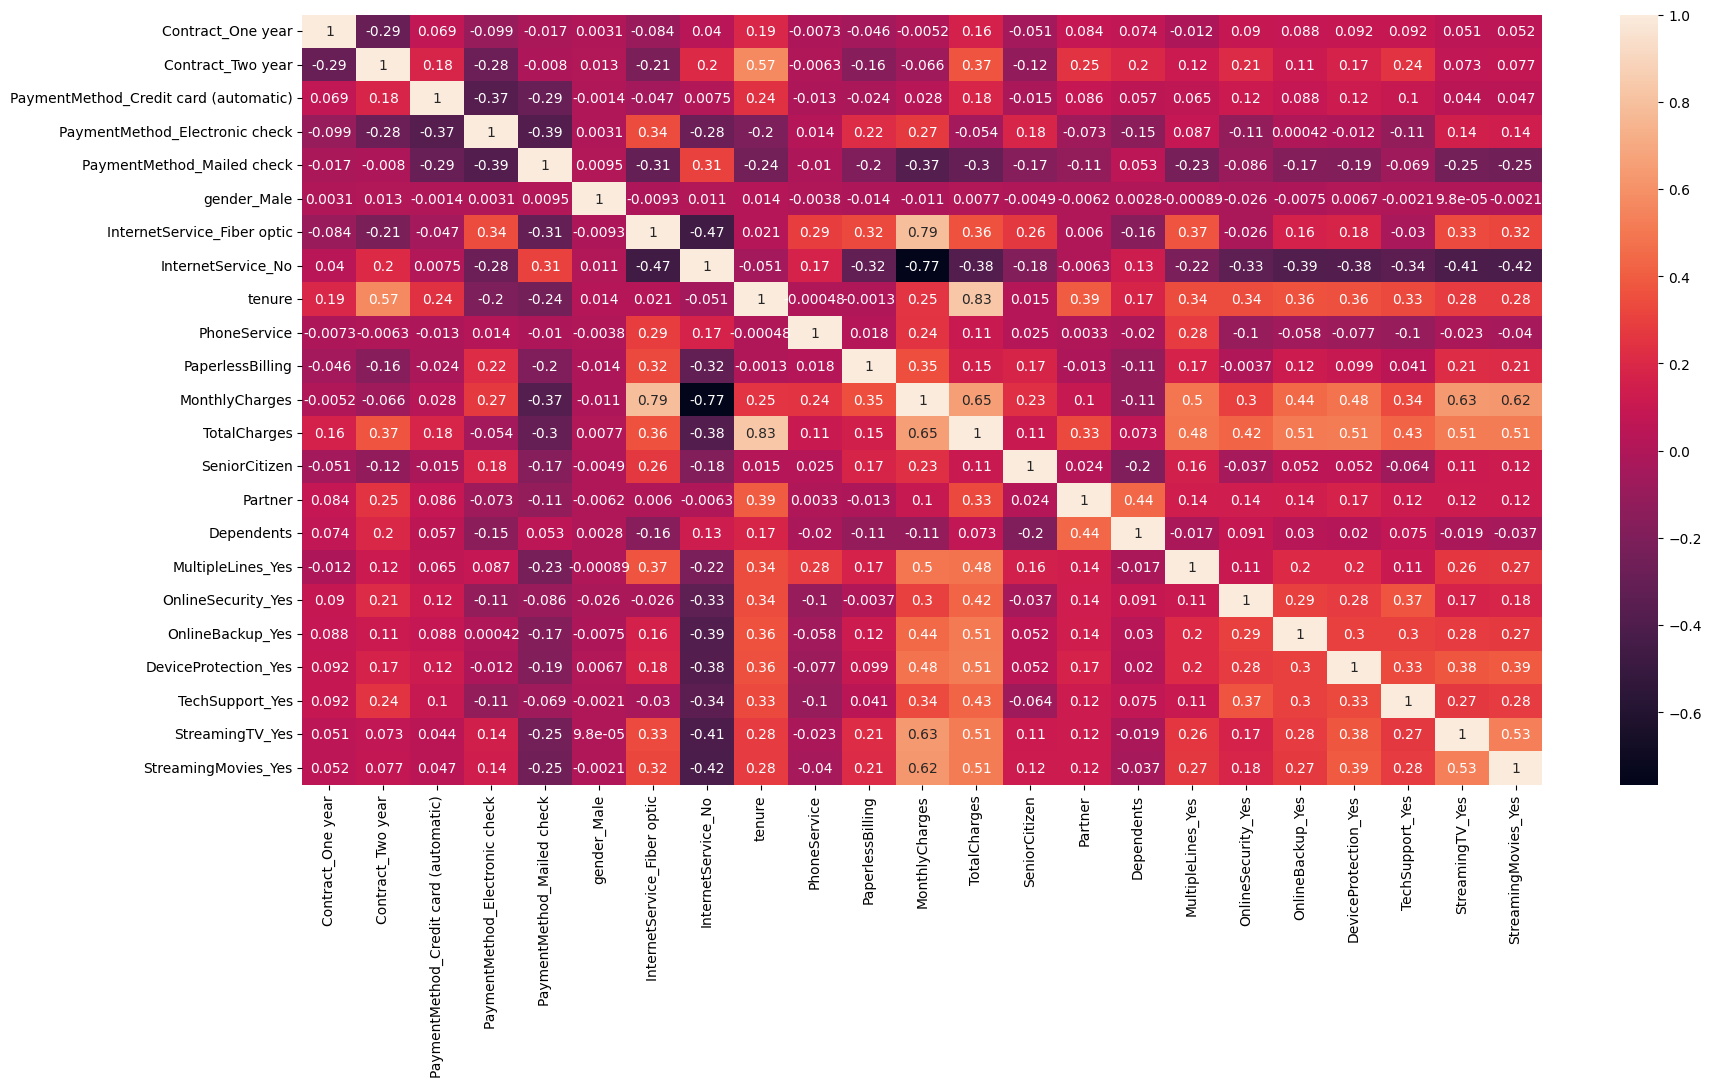

In [173]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [174]:
import statsmodels.api as sm

In [176]:
##Logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 15 Aug 2023   Deviance:                       4009.4
Time:                        19:35:19   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [177]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [178]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [179]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True])

In [180]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [181]:
# selecting the selected variable via RFE in col list

col = x_train.columns[rfe.support_]
print(col)

Index(['Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')


In [182]:
x_train.columns[~rfe.support_]


Index(['PaymentMethod_Electronic check', 'gender_Male', 'PhoneService',
       'Partner', 'Dependents', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [183]:
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Tue, 15 Aug 2023   Deviance:                       4022.2
Time:                        19:35:39   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [184]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [185]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustId']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustId
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


In [186]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [187]:
from sklearn import metrics

In [188]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[2796,  839],
       [ 287, 1000]])

In [190]:

metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)


0.7712312068264933

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [192]:
def calculateVIF():
    vif = pd.DataFrame()
    vif['Features'] = x_train[col].columns
    vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [193]:
calculateVIF()

,Features,VIF
8,MonthlyCharges,14.85
9,TotalCharges,10.42
6,tenure,7.38
4,InternetService_Fiber optic,5.61
5,InternetService_No,5.27
1,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
7,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [194]:
col=col.drop('MonthlyCharges',1)

In [195]:
x_train_sm=sm.add_constant(x_train[col])
logm4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Tue, 15 Aug 2023   Deviance:                       4046.2
Time:                        19:49:15   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [196]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.227902
5790    0.228644
6498    0.674892
880     0.615868
2784    0.662260
3874    0.418199
5387    0.288133
6623    0.795137
4465    0.174332
5364    0.519088
dtype: float64

In [197]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustId']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustId
879,0,0.227902,879
5790,0,0.228644,5790
6498,1,0.674892,6498
880,1,0.615868,880
2784,1,0.662260,2784


In [198]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted
879,0,0.227902,879,0
5790,0,0.228644,5790,0
6498,1,0.674892,6498,1
880,1,0.615868,880,1
2784,1,0.662260,2784,1


In [199]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion


array([[3269,  366],
       [ 590,  697]])

In [200]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)


0.8057700121901666

In [201]:
calculateVIF()

,Features,VIF
8,TotalCharges,7.46
6,tenure,6.90
1,Contract_Two year,3.07
4,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
7,PaperlessBilling,2.55
5,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [202]:
col=col.drop('TotalCharges',1)

In [203]:
x_train_sm=sm.add_constant(x_train[col])
logm5=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Tue, 15 Aug 2023   Deviance:                       4051.9
Time:                        19:49:42   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [204]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.245817
5790    0.265361
6498    0.669410
880     0.630970
2784    0.682916
3874    0.399526
5387    0.275828
6623    0.798168
4465    0.198786
5364    0.529119
dtype: float64

In [205]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustId']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustId
879,0,0.245817,879
5790,0,0.265361,5790
6498,1,0.669410,6498
880,1,0.630970,880
2784,1,0.682916,2784


In [206]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted
879,0,0.245817,879,0
5790,0,0.265361,5790,0
6498,1,0.669410,6498,1
880,1,0.630970,880,1
2784,1,0.682916,2784,1


In [207]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3278,  357],
       [ 597,  690]])

In [208]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)


0.8061763510767981

In [209]:
calculateVIF()

,Features,VIF
1,Contract_Two year,2.98
4,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
7,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
6,tenure,2.04
5,InternetService_No,2.03
10,TechSupport_Yes,1.92
0,Contract_One year,1.78


In [210]:
TP = confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [211]:
## sensitivity of the model
TP/float(TP+FN)

0.5361305361305362

In [212]:
## specificity of the model
TN/float(TN+FP)

0.9017881705639614

In [213]:
## calculate false postive rate  - when you predict churn but the person did not churn
FP/float(TN+FP)

0.09821182943603851

In [214]:
##positive predictive value
TP/float(TP+FP)

0.6590257879656161

In [215]:
##negative predicitive value
TN/float(TN+FN)

0.8459354838709677

In [216]:
def draw_roc(actuals,probs):
  fpr,tpr,thresholds=metrics.roc_curve(actuals,probs,drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actuals,probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr,tpr,label='Roc curve(area=%.02f)'%auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False postive rate or [1- True negative rate]')
  plt.ylabel('True postive rate')
  plt.title('Reciever operator charactersic example')
  plt.legend(loc='lower right')
  plt.show()
  return None



In [217]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob,drop_intermediate=False)

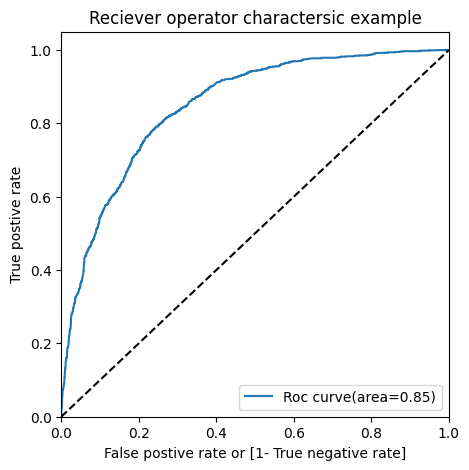

In [218]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [219]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [220]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','senstivity','specificity'])
from sklearn.metrics import  confusion_matrix
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
  total1=sum(sum(cm1))
  accuracy=(cm1[0,0]+cm1[1,1])/total1
  specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  senstivity  specificity
0.0   0.0  0.261479    1.000000     0.000000
0.1   0.1  0.614994    0.943279     0.498762
0.2   0.2  0.721861    0.846154     0.677854
0.3   0.3  0.770012    0.776224     0.767813
0.4   0.4  0.790532    0.636364     0.845117
0.5   0.5  0.806176    0.536131     0.901788
0.6   0.6  0.798050    0.380730     0.945805
0.7   0.7  0.776310    0.196581     0.981568
0.8   0.8  0.747867    0.041181     0.998074
0.9   0.9  0.738521    0.000000     1.000000


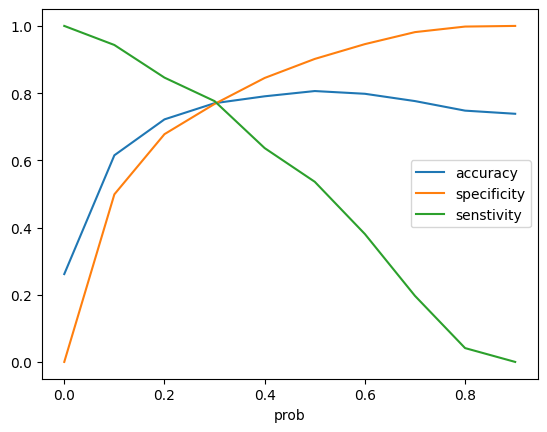

In [221]:
cutoff_df.plot.line(x='prob',y=['accuracy','specificity','senstivity'])
plt.show()

In [223]:
##Precision
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.6590257879656161

In [224]:
## recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5361305361305362

In [225]:
from sklearn.metrics import precision_score,recall_score

In [226]:
precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.6590257879656161

In [227]:
recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.5361305361305362

In [228]:
from sklearn.metrics import precision_recall_curve

In [229]:
precision,recall,thresholds = precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

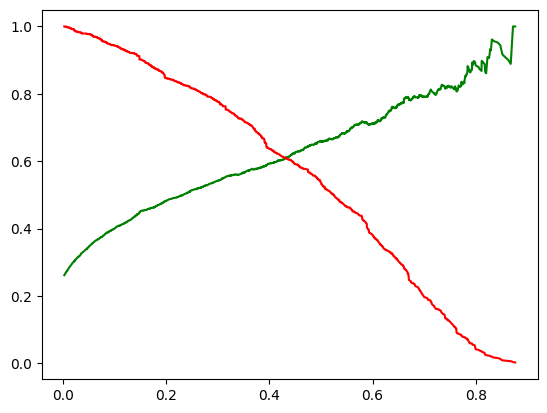

In [233]:
plt.plot(thresholds,precision[:-1],"g-")
plt.plot(thresholds,recall[:-1],"r-")
plt.show()

In [234]:
x_test[['tenure','MonthlyCharges','TotalCharges']] =scaler.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [235]:
x_test=x_test[col]
x_test.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,tenure,PaperlessBilling,SeniorCitizen,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,0,1,0,1,0,-0.347623,1,0,0,0,0,1
3730,0,0,1,0,1,0,0.999203,1,0,1,0,1,1
1761,0,1,1,0,0,1,1.040015,1,0,1,0,0,0
2283,0,0,0,1,1,0,-1.286319,1,0,0,0,0,0
1872,0,1,0,0,0,1,0.346196,0,0,0,0,0,0


In [236]:
x_test_sm=sm.add_constant(x_test)


In [237]:
y_test_pred=res.predict(x_test_sm)

In [238]:
y_test_pred[0:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [239]:
y_pred_1=pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.419725
3730,0.260232
1761,0.008650
2283,0.592626
1872,0.013989


In [240]:
y_test_df=pd.DataFrame(y_test)

In [241]:
y_test_df['CustId']=y_test_df.index

In [242]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Churn,CustId,0
0,0,942,0.419725
1,1,3730,0.260232
2,0,1761,0.008650
3,1,2283,0.592626
4,0,1872,0.013989


In [245]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_Prob'})

In [246]:
# y_pred_final=y_pred_final.reindex_axis(['CustId','Churn','Churn_Prob'],axis=1)
# y_pred_final.head()

AttributeError: ignored

In [248]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)
y_pred_final.head()

,Churn,CustId,Churn_Prob,final_predicted
0,0,942,0.419725,1
1,1,3730,0.260232,0
2,0,1761,0.008650,0
3,1,2283,0.592626,1
4,0,1872,0.013989,0


In [249]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.7407582938388626

In [251]:
confusion2=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion2

array([[1144,  384],
       [ 163,  419]])

In [252]:
TP = confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [253]:
## sentivitity on test set
TP/float(TP+FN)

0.7199312714776632

In [254]:
## specificity on test set
TN/float(TN+FP)

0.7486910994764397